# Import dependencies

In [816]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
import tensorflow as tf
import os

# Load Data

In [347]:
finance_data = {'GC=F':'Gold','BNO':'United States Brent Oil Fund','CL=F':'Crude Oil','BZ=F':'Brent Crude Oil','^DJI':'Dow Jones Industrial Average','EGO':'Eldorado Gold Corporation','EURUSD=X':'EUR-USD','GDX':'VanEck Gold Miners ETF','PA=F':'Palladium','PL=F':'Platinum ','^GSPC':'S&P 500','SI=F':'Silver','DX-Y.NYB':'ICE US Dollar Index','USO':'United States Oil Fund'}

In [348]:
for key, value in finance_data.items():
    df = yf.download(tickers=key,period='11y',interval='1d',rounding=True)   
    columns = df.columns
    if value not in ['Gold', 'Dow Jones Industrial Average','S&P 500']:
        df = df.drop('Adj Close',axis=1)
    if value != 'Gold':
        for col in columns:
            df.rename(columns = {col:f'{key}_{col}'},inplace=True)
    df.to_csv(f'Gold Price(YahooFinance)/{value}.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [349]:
path = './Gold Price(YahooFinance)'
csv_files = glob.glob(path + "/*.csv")

In [350]:
for i in range(0,len(csv_files)-1,1):
    if i == 0:
        df = pd.read_csv(csv_files[i])
    df2 = pd.read_csv(csv_files[i+1])
    df = pd.merge(df, df2,on = 'Date')

In [351]:
df

,Date,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume
0,2012-10-22,110.57,110.96,109.19,109.44,586,89.52,90.80,88.20,88.73,...,266.48,267.36,261.44,263.20,2151675,51.62,52.48,51.56,52.43,10197500
1,2012-10-23,108.68,108.88,107.38,108.25,602,89.14,89.29,85.69,86.67,...,257.12,257.20,252.96,255.76,1754688,51.23,51.48,50.92,50.96,14897400
2,2012-10-24,108.50,108.77,106.93,107.85,503,86.60,87.47,84.94,85.73,...,255.04,255.68,250.80,253.04,1698888,51.35,51.50,49.98,50.06,15897400
3,2012-10-25,108.77,109.22,107.67,108.49,532,85.65,86.75,85.23,86.05,...,255.20,255.52,251.60,254.24,1061200,51.29,51.73,51.02,51.59,17175500
4,2012-10-26,107.98,109.67,107.94,109.55,395,86.00,86.37,85.00,86.28,...,253.20,254.88,252.48,254.32,995325,51.71,51.88,51.00,51.24,8553500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,2023-10-16,90.92,91.39,89.49,89.65,28811,87.72,88.33,86.32,86.66,...,78.63,78.89,77.87,78.39,5156200,28.86,29.19,28.64,29.00,16394500
2720,2023-10-17,90.06,90.92,88.87,89.90,27054,87.06,87.75,85.60,86.66,...,77.98,78.88,77.40,78.80,3914400,28.98,29.57,28.83,29.53,17620000
2721,2023-10-18,90.90,92.97,90.60,91.50,35456,87.81,89.88,87.20,88.32,...,79.72,80.36,79.32,79.84,4647300,29.98,30.07,29.27,29.45,23181100
2722,2023-10-19,91.34,93.47,89.53,92.38,34880,88.24,90.68,86.60,89.37,...,79.37,81.75,78.94,81.68,5924400,29.45,29.59,29.00,29.51,24517100


In [352]:
df.columns

Index(['Date', 'BZ=F_Open', 'BZ=F_High', 'BZ=F_Low', 'BZ=F_Close',
       'BZ=F_Volume', 'CL=F_Open', 'CL=F_High', 'CL=F_Low', 'CL=F_Close',
       'CL=F_Volume', '^DJI_Open', '^DJI_High', '^DJI_Low', '^DJI_Close',
       '^DJI_Adj Close', '^DJI_Volume', 'EGO_Open', 'EGO_High', 'EGO_Low',
       'EGO_Close', 'EGO_Volume', 'EURUSD=X_Open', 'EURUSD=X_High',
       'EURUSD=X_Low', 'EURUSD=X_Close', 'EURUSD=X_Volume', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume', 'DX-Y.NYB_Open', 'DX-Y.NYB_High',
       'DX-Y.NYB_Low', 'DX-Y.NYB_Close', 'DX-Y.NYB_Volume', 'PA=F_Open',
       'PA=F_High', 'PA=F_Low', 'PA=F_Close', 'PA=F_Volume', 'PL=F_Open',
       'PL=F_High', 'PL=F_Low', 'PL=F_Close', 'PL=F_Volume', '^GSPC_Open',
       '^GSPC_High', '^GSPC_Low', '^GSPC_Close', '^GSPC_Adj Close',
       '^GSPC_Volume', 'SI=F_Open', 'SI=F_High', 'SI=F_Low', 'SI=F_Close',
       'SI=F_Volume', 'BNO_Open', 'BNO_High', 'BNO_Low', 'BNO_Close',
       'BNO_Volume', 'USO_Open', 'USO_High', 'USO_L

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2724 non-null   object 
 1   BZ=F_Open        2724 non-null   float64
 2   BZ=F_High        2724 non-null   float64
 3   BZ=F_Low         2724 non-null   float64
 4   BZ=F_Close       2724 non-null   float64
 5   BZ=F_Volume      2724 non-null   int64  
 6   CL=F_Open        2724 non-null   float64
 7   CL=F_High        2724 non-null   float64
 8   CL=F_Low         2724 non-null   float64
 9   CL=F_Close       2724 non-null   float64
 10  CL=F_Volume      2724 non-null   int64  
 11  ^DJI_Open        2724 non-null   float64
 12  ^DJI_High        2724 non-null   float64
 13  ^DJI_Low         2724 non-null   float64
 14  ^DJI_Close       2724 non-null   float64
 15  ^DJI_Adj Close   2724 non-null   float64
 16  ^DJI_Volume      2724 non-null   int64  
 17  EGO_Open      

In [354]:
df.set_index('Date')

,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-22,110.57,110.96,109.19,109.44,586,89.52,90.80,88.20,88.73,275720,...,266.48,267.36,261.44,263.20,2151675,51.62,52.48,51.56,52.43,10197500
2012-10-23,108.68,108.88,107.38,108.25,602,89.14,89.29,85.69,86.67,309492,...,257.12,257.20,252.96,255.76,1754688,51.23,51.48,50.92,50.96,14897400
2012-10-24,108.50,108.77,106.93,107.85,503,86.60,87.47,84.94,85.73,298160,...,255.04,255.68,250.80,253.04,1698888,51.35,51.50,49.98,50.06,15897400
2012-10-25,108.77,109.22,107.67,108.49,532,85.65,86.75,85.23,86.05,208678,...,255.20,255.52,251.60,254.24,1061200,51.29,51.73,51.02,51.59,17175500
2012-10-26,107.98,109.67,107.94,109.55,395,86.00,86.37,85.00,86.28,212378,...,253.20,254.88,252.48,254.32,995325,51.71,51.88,51.00,51.24,8553500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,90.92,91.39,89.49,89.65,28811,87.72,88.33,86.32,86.66,235780,...,78.63,78.89,77.87,78.39,5156200,28.86,29.19,28.64,29.00,16394500
2023-10-17,90.06,90.92,88.87,89.90,27054,87.06,87.75,85.60,86.66,197124,...,77.98,78.88,77.40,78.80,3914400,28.98,29.57,28.83,29.53,17620000
2023-10-18,90.90,92.97,90.60,91.50,35456,87.81,89.88,87.20,88.32,92797,...,79.72,80.36,79.32,79.84,4647300,29.98,30.07,29.27,29.45,23181100


In [355]:
df.columns

Index(['Date', 'BZ=F_Open', 'BZ=F_High', 'BZ=F_Low', 'BZ=F_Close',
       'BZ=F_Volume', 'CL=F_Open', 'CL=F_High', 'CL=F_Low', 'CL=F_Close',
       'CL=F_Volume', '^DJI_Open', '^DJI_High', '^DJI_Low', '^DJI_Close',
       '^DJI_Adj Close', '^DJI_Volume', 'EGO_Open', 'EGO_High', 'EGO_Low',
       'EGO_Close', 'EGO_Volume', 'EURUSD=X_Open', 'EURUSD=X_High',
       'EURUSD=X_Low', 'EURUSD=X_Close', 'EURUSD=X_Volume', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume', 'DX-Y.NYB_Open', 'DX-Y.NYB_High',
       'DX-Y.NYB_Low', 'DX-Y.NYB_Close', 'DX-Y.NYB_Volume', 'PA=F_Open',
       'PA=F_High', 'PA=F_Low', 'PA=F_Close', 'PA=F_Volume', 'PL=F_Open',
       'PL=F_High', 'PL=F_Low', 'PL=F_Close', 'PL=F_Volume', '^GSPC_Open',
       '^GSPC_High', '^GSPC_Low', '^GSPC_Close', '^GSPC_Adj Close',
       '^GSPC_Volume', 'SI=F_Open', 'SI=F_High', 'SI=F_Low', 'SI=F_Close',
       'SI=F_Volume', 'BNO_Open', 'BNO_High', 'BNO_Low', 'BNO_Close',
       'BNO_Volume', 'USO_Open', 'USO_High', 'USO_L

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2724 non-null   object 
 1   BZ=F_Open        2724 non-null   float64
 2   BZ=F_High        2724 non-null   float64
 3   BZ=F_Low         2724 non-null   float64
 4   BZ=F_Close       2724 non-null   float64
 5   BZ=F_Volume      2724 non-null   int64  
 6   CL=F_Open        2724 non-null   float64
 7   CL=F_High        2724 non-null   float64
 8   CL=F_Low         2724 non-null   float64
 9   CL=F_Close       2724 non-null   float64
 10  CL=F_Volume      2724 non-null   int64  
 11  ^DJI_Open        2724 non-null   float64
 12  ^DJI_High        2724 non-null   float64
 13  ^DJI_Low         2724 non-null   float64
 14  ^DJI_Close       2724 non-null   float64
 15  ^DJI_Adj Close   2724 non-null   float64
 16  ^DJI_Volume      2724 non-null   int64  
 17  EGO_Open      

In [357]:
df.to_csv('Gold_Prediction.csv',index=False)

In [358]:
df = pd.read_csv('./Gold_Prediction.csv',index_col='Date')

In [359]:
df

,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-22,110.57,110.96,109.19,109.44,586,89.52,90.80,88.20,88.73,275720,...,266.48,267.36,261.44,263.20,2151675,51.62,52.48,51.56,52.43,10197500
2012-10-23,108.68,108.88,107.38,108.25,602,89.14,89.29,85.69,86.67,309492,...,257.12,257.20,252.96,255.76,1754688,51.23,51.48,50.92,50.96,14897400
2012-10-24,108.50,108.77,106.93,107.85,503,86.60,87.47,84.94,85.73,298160,...,255.04,255.68,250.80,253.04,1698888,51.35,51.50,49.98,50.06,15897400
2012-10-25,108.77,109.22,107.67,108.49,532,85.65,86.75,85.23,86.05,208678,...,255.20,255.52,251.60,254.24,1061200,51.29,51.73,51.02,51.59,17175500
2012-10-26,107.98,109.67,107.94,109.55,395,86.00,86.37,85.00,86.28,212378,...,253.20,254.88,252.48,254.32,995325,51.71,51.88,51.00,51.24,8553500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,90.92,91.39,89.49,89.65,28811,87.72,88.33,86.32,86.66,235780,...,78.63,78.89,77.87,78.39,5156200,28.86,29.19,28.64,29.00,16394500
2023-10-17,90.06,90.92,88.87,89.90,27054,87.06,87.75,85.60,86.66,197124,...,77.98,78.88,77.40,78.80,3914400,28.98,29.57,28.83,29.53,17620000
2023-10-18,90.90,92.97,90.60,91.50,35456,87.81,89.88,87.20,88.32,92797,...,79.72,80.36,79.32,79.84,4647300,29.98,30.07,29.27,29.45,23181100


In [360]:
df['^DJI_Adj Close']

Date
2012-10-22    13345.89
2012-10-23    13102.53
2012-10-24    13077.34
2012-10-25    13103.68
2012-10-26    13107.21
                ...   
2023-10-16    33984.54
2023-10-17    33997.65
2023-10-18    33665.08
2023-10-19    33414.17
2023-10-20    33127.28
Name: ^DJI_Adj Close, Length: 2724, dtype: float64

In [361]:
df['^GSPC_Adj Close']

Date
2012-10-22    1433.82
2012-10-23    1413.11
2012-10-24    1408.75
2012-10-25    1412.97
2012-10-26    1411.94
               ...   
2023-10-16    4373.63
2023-10-17    4373.20
2023-10-18    4314.60
2023-10-19    4278.00
2023-10-20    4224.16
Name: ^GSPC_Adj Close, Length: 2724, dtype: float64

# Inspecting Data

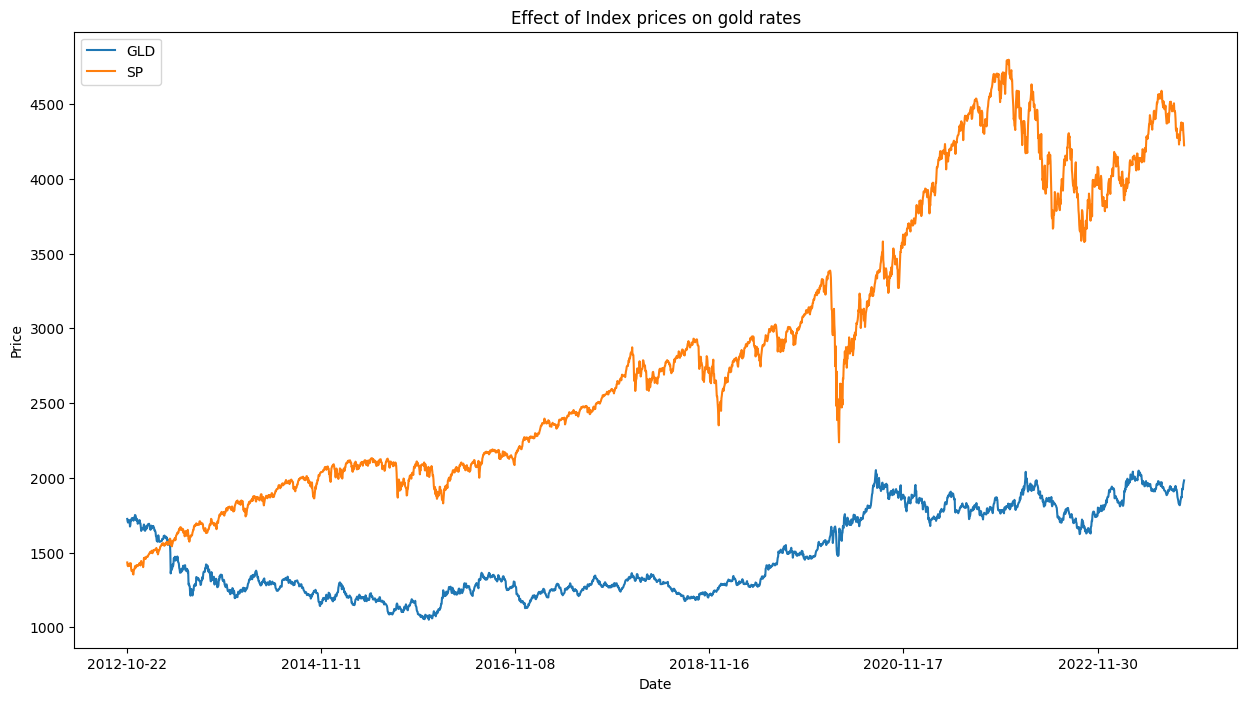

In [362]:
GLD_adj_close = df['Adj Close']
SPY_adj_close = df['^GSPC_Adj Close']
DJ_adj_close  = df['^DJI_Adj Close']
df_p = pd.DataFrame({'GLD':GLD_adj_close,'SP':SPY_adj_close})
df_ax = df_p.plot(title = 'Effect of Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc = 'upper left')
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_9712\188779979.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

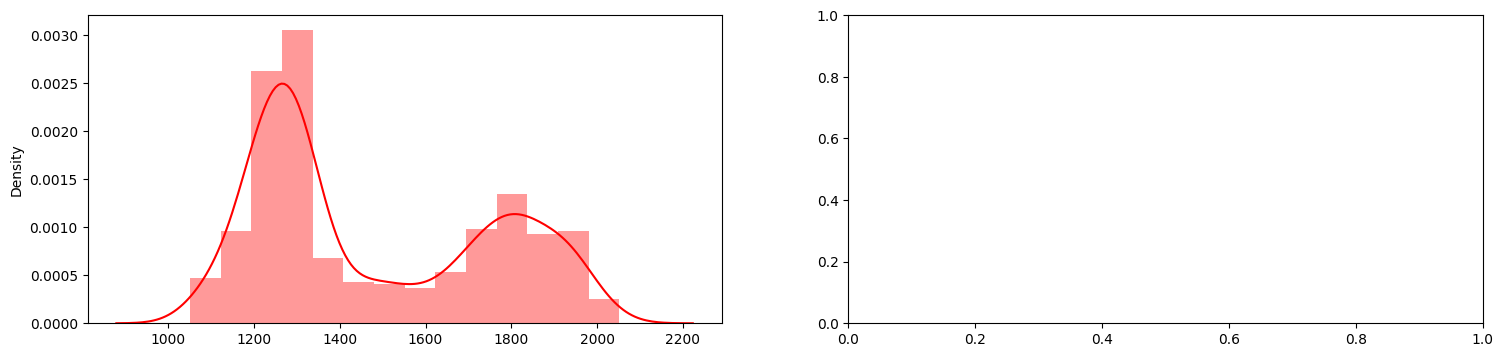

In [381]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Adj Close'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=14)
ax.set_xlim([min(amount_val), max(amount_val)])



plt.show()

In [19]:
X=df.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<Axes: title={'center': 'Correlation with Adj Close'}>

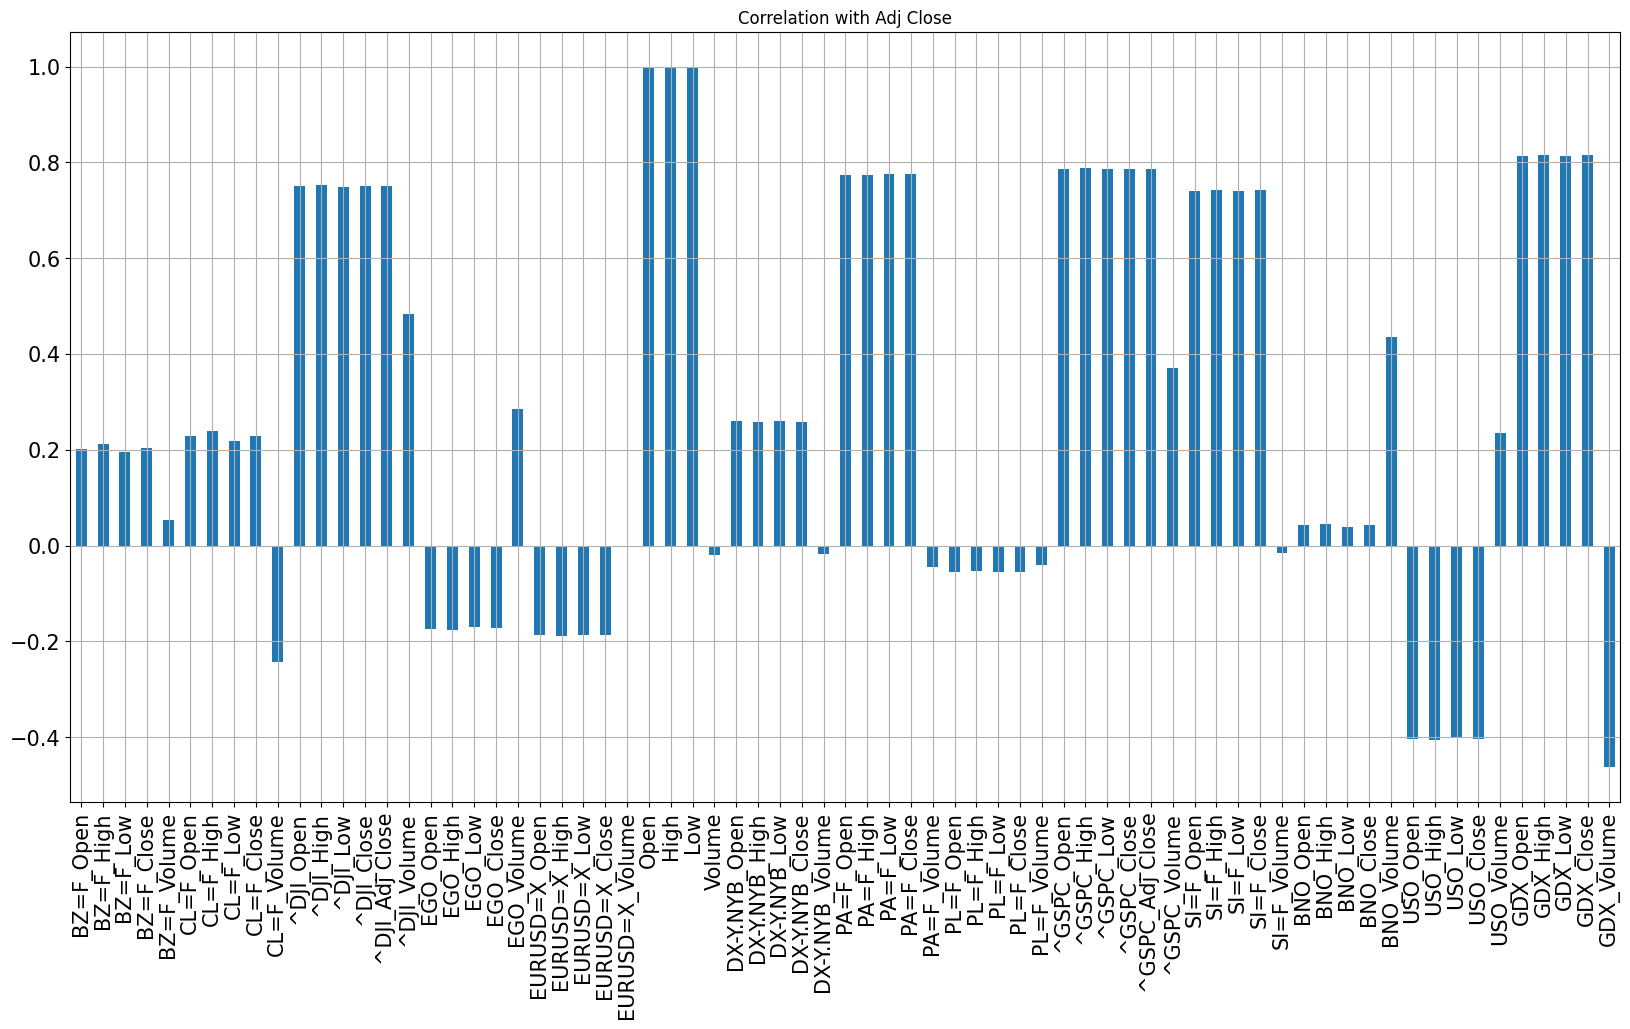

In [20]:
X.corrwith(df['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 15,
        rot = 90, grid = True)

In [21]:
corr_matrix = df.corr()
coef = corr_matrix['Adj Close'].sort_values(ascending=False)

In [22]:
pos_corr = coef[coef>0]
pos_corr

Close              1.000000
Adj Close          1.000000
Low                0.999540
High               0.999431
Open               0.998916
GDX_High           0.816431
GDX_Close          0.815328
GDX_Open           0.814316
GDX_Low            0.813580
^GSPC_High         0.788033
^GSPC_Adj Close    0.786919
^GSPC_Close        0.786919
^GSPC_Open         0.786713
^GSPC_Low          0.785466
PA=F_Close         0.774992
PA=F_Low           0.774888
PA=F_High          0.774569
PA=F_Open          0.774483
^DJI_High          0.752163
^DJI_Adj Close     0.750795
^DJI_Close         0.750795
^DJI_Open          0.750712
^DJI_Low           0.749239
SI=F_High          0.743091
SI=F_Close         0.742204
SI=F_Open          0.740581
SI=F_Low           0.740149
^DJI_Volume        0.484436
BNO_Volume         0.436408
^GSPC_Volume       0.370020
EGO_Volume         0.284818
DX-Y.NYB_Low       0.260876
DX-Y.NYB_Open      0.259671
DX-Y.NYB_Close     0.259019
DX-Y.NYB_High      0.258171
CL=F_High          0

In [23]:
neg_corr=coef[coef<0]
neg_corr

SI=F_Volume       -0.014949
DX-Y.NYB_Volume   -0.017113
Volume            -0.020092
PL=F_Volume       -0.040839
PA=F_Volume       -0.043695
PL=F_High         -0.053665
PL=F_Close        -0.054499
PL=F_Open         -0.054753
PL=F_Low          -0.055812
EGO_Low           -0.169613
EGO_Close         -0.172711
EGO_Open          -0.173108
EGO_High          -0.176496
EURUSD=X_Low      -0.185895
EURUSD=X_Close    -0.187602
EURUSD=X_Open     -0.187648
EURUSD=X_High     -0.189195
CL=F_Volume       -0.243130
USO_Low           -0.402147
USO_Close         -0.403491
USO_Open          -0.403841
USO_High          -0.405630
GDX_Volume        -0.462016
Name: Adj Close, dtype: float64

In [24]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

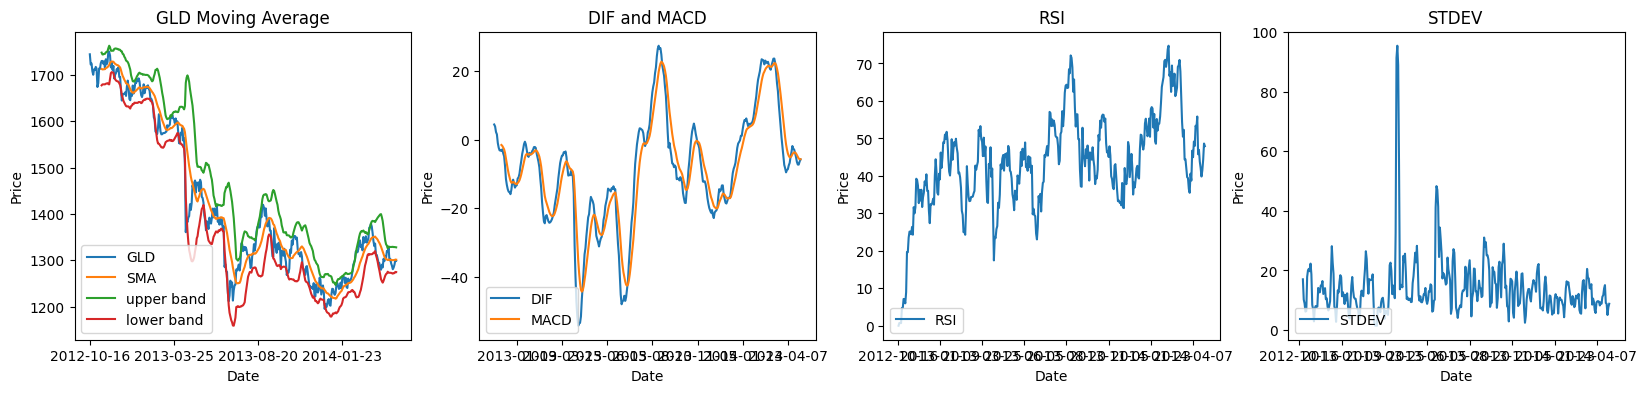

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=df.Open - df.Close

High_Low=df.High-df.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

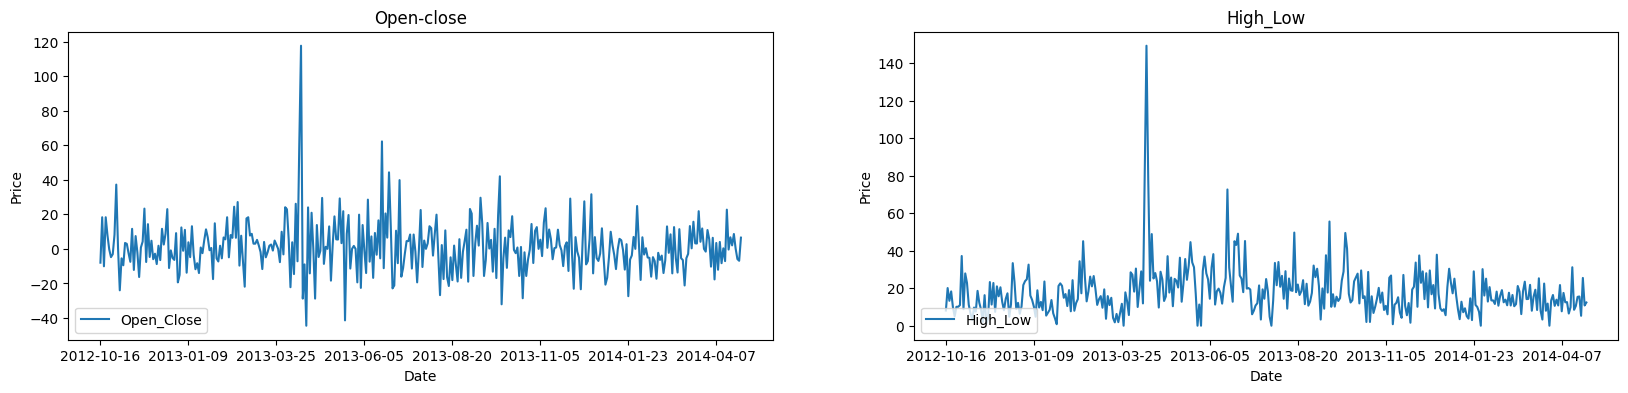

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
Open_Close=df.Open - df.Close
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=df.High-df.Low
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')




axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [27]:
test = df
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close']=Open_Close
test['High_Low']=High_Low



# Target column
test = test.dropna(subset='MACD')
target_adj_close = pd.DataFrame(test['Adj Close'])


display(test.head())

,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume,...,GDX_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-11,108.32,108.34,107.43,108.01,1065,85.70,86.37,85.21,85.79,217859,...,7457600,1721.346667,1756.500928,1686.192405,-3.282425,-1.528526,37.515589,7.842321,1.8,8.2
2012-12-12,108.90,110.47,108.85,109.50,1756,85.69,87.68,85.68,86.77,300353,...,23020300,1720.186667,1754.693881,1685.679453,-2.812705,-1.816257,40.409357,6.584224,-6.5,14.3
2012-12-13,108.99,109.17,107.81,107.91,833,86.77,86.97,85.81,85.89,228417,...,15955300,1718.346667,1755.039435,1681.653898,-3.992102,-2.292319,35.949800,8.176307,11.6,17.3
2012-12-14,109.15,109.15,109.15,109.15,306,86.13,86.92,86.05,86.73,218265,...,12424800,1716.206667,1754.231656,1678.181677,-4.853795,-2.842417,36.021847,9.724608,2.5,4.8
2012-12-19,109.98,110.43,109.31,110.36,703,87.94,89.90,87.81,89.51,233083,...,10954600,1710.553333,1751.333081,1669.773586,-7.694363,-3.869257,30.616206,18.988102,8.8,11.4


In [28]:
test.columns

Index(['BZ=F_Open', 'BZ=F_High', 'BZ=F_Low', 'BZ=F_Close', 'BZ=F_Volume',
       'CL=F_Open', 'CL=F_High', 'CL=F_Low', 'CL=F_Close', 'CL=F_Volume',
       '^DJI_Open', '^DJI_High', '^DJI_Low', '^DJI_Close', '^DJI_Adj Close',
       '^DJI_Volume', 'EGO_Open', 'EGO_High', 'EGO_Low', 'EGO_Close',
       'EGO_Volume', 'EURUSD=X_Open', 'EURUSD=X_High', 'EURUSD=X_Low',
       'EURUSD=X_Close', 'EURUSD=X_Volume', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'DX-Y.NYB_Open', 'DX-Y.NYB_High', 'DX-Y.NYB_Low',
       'DX-Y.NYB_Close', 'DX-Y.NYB_Volume', 'PA=F_Open', 'PA=F_High',
       'PA=F_Low', 'PA=F_Close', 'PA=F_Volume', 'PL=F_Open', 'PL=F_High',
       'PL=F_Low', 'PL=F_Close', 'PL=F_Volume', '^GSPC_Open', '^GSPC_High',
       '^GSPC_Low', '^GSPC_Close', '^GSPC_Adj Close', '^GSPC_Volume',
       'SI=F_Open', 'SI=F_High', 'SI=F_Low', 'SI=F_Close', 'SI=F_Volume',
       'BNO_Open', 'BNO_High', 'BNO_Low', 'BNO_Close', 'BNO_Volume',
       'USO_Open', 'USO_High', 'USO_Low', 'US

In [29]:
feature_columns = ['BZ=F_Open', 'BZ=F_High', 'BZ=F_Low', 'BZ=F_Close', 'BZ=F_Volume',
       'CL=F_Open', 'CL=F_High', 'CL=F_Low', 'CL=F_Close', 'CL=F_Volume',
       '^DJI_Open', '^DJI_High', '^DJI_Low', '^DJI_Close', '^DJI_Adj Close',
       '^DJI_Volume', 'EGO_Open', 'EGO_High', 'EGO_Low', 'EGO_Close',
       'EGO_Volume', 'EURUSD=X_Open', 'EURUSD=X_High', 'EURUSD=X_Low',
       'EURUSD=X_Close', 'EURUSD=X_Volume', 'Open', 'High', 'Low','Volume', 'DX-Y.NYB_Open', 'DX-Y.NYB_High', 'DX-Y.NYB_Low',
       'DX-Y.NYB_Close', 'DX-Y.NYB_Volume', 'PA=F_Open', 'PA=F_High',
       'PA=F_Low', 'PA=F_Close', 'PA=F_Volume', 'PL=F_Open', 'PL=F_High',
       'PL=F_Low', 'PL=F_Close', 'PL=F_Volume', '^GSPC_Open', '^GSPC_High',
       '^GSPC_Low', '^GSPC_Close', '^GSPC_Adj Close', '^GSPC_Volume',
       'SI=F_Open', 'SI=F_High', 'SI=F_Low', 'SI=F_Close', 'SI=F_Volume',
       'BNO_Open', 'BNO_High', 'BNO_Low', 'BNO_Close', 'BNO_Volume',
       'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Volume',
       'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Volume', 'SMA',
       'Upper_band', 'Lower_band', 'DIF', 'MACD', 'RSI', 'STDEV', 'Open_Close',
       'High_Low']

# Random Forest

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.columns

Index(['BZ=F_Open', 'BZ=F_High', 'BZ=F_Low', 'BZ=F_Close', 'BZ=F_Volume',
       'CL=F_Open', 'CL=F_High', 'CL=F_Low', 'CL=F_Close', 'CL=F_Volume',
       '^DJI_Open', '^DJI_High', '^DJI_Low', '^DJI_Close', '^DJI_Adj Close',
       '^DJI_Volume', 'EGO_Open', 'EGO_High', 'EGO_Low', 'EGO_Close',
       'EGO_Volume', 'EURUSD=X_Open', 'EURUSD=X_High', 'EURUSD=X_Low',
       'EURUSD=X_Close', 'EURUSD=X_Volume', 'Open', 'High', 'Low', 'Volume',
       'DX-Y.NYB_Open', 'DX-Y.NYB_High', 'DX-Y.NYB_Low', 'DX-Y.NYB_Close',
       'DX-Y.NYB_Volume', 'PA=F_Open', 'PA=F_High', 'PA=F_Low', 'PA=F_Close',
       'PA=F_Volume', 'PL=F_Open', 'PL=F_High', 'PL=F_Low', 'PL=F_Close',
       'PL=F_Volume', '^GSPC_Open', '^GSPC_High', '^GSPC_Low', '^GSPC_Close',
       '^GSPC_Adj Close', '^GSPC_Volume', 'SI=F_Open', 'SI=F_High', 'SI=F_Low',
       'SI=F_Close', 'SI=F_Volume', 'BNO_Open', 'BNO_High', 'BNO_Low',
       'BNO_Close', 'BNO_Volume', 'USO_Open', 'USO_High', 'USO_Low',
       'USO_Close', 'USO_Volume'

In [31]:
X_gold = test[feature_columns]

In [32]:
Y_gold = test['Adj Close']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
Gold_train, Gold_test, Res_train, Res_test = train_test_split(X_gold, Y_gold, test_size=0.1)

In [35]:
Gold_train.shape

(2419, 80)

In [36]:
Res_train.shape

(2419,)

In [37]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume,...,GDX_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-11,0.806836,0.752355,0.858498,0.816199,0.012215,0.719025,0.622207,0.779157,0.765016,0.095209,...,0.008227,0.691475,0.675035,0.691187,0.433830,0.432457,0.288569,0.074718,0.394035,0.054886
2012-12-12,0.812108,0.770760,0.871831,0.829913,0.020141,0.718953,0.633422,0.782074,0.771090,0.131260,...,0.076919,0.690247,0.673215,0.690635,0.437817,0.429556,0.330155,0.061432,0.350602,0.095716
2012-12-13,0.812926,0.759526,0.862066,0.815278,0.009554,0.726742,0.627344,0.782881,0.765636,0.099823,...,0.045735,0.688299,0.673563,0.686305,0.427806,0.424755,0.266067,0.078245,0.445317,0.115797
2012-12-14,0.814381,0.759354,0.874648,0.826691,0.003510,0.722126,0.626916,0.784371,0.770842,0.095386,...,0.030152,0.686033,0.672750,0.682569,0.420491,0.419209,0.267102,0.094595,0.397698,0.032129
2012-12-19,0.821925,0.770414,0.876150,0.837828,0.008063,0.735180,0.652427,0.795295,0.788074,0.101862,...,0.023663,0.680048,0.669830,0.673524,0.396378,0.408855,0.189418,0.192418,0.430665,0.076305


Shape of features :  (2688, 80)
Shape of target :  (2688, 1)


,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume,...,GDX_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-06,0.587765,0.550333,0.633333,0.600552,0.473178,0.694360,0.595754,0.756129,0.746420,0.201527,...,0.088099,0.857369,0.894186,0.794266,0.235367,0.268071,0.184175,0.058650,0.326007,0.149933
2023-10-09,0.607127,0.585242,0.657934,0.633410,0.425486,0.715780,0.629655,0.775805,0.768673,0.190119,...,0.077018,0.851581,0.884874,0.792451,0.248341,0.253345,0.306094,0.131478,0.347985,0.127175
2023-10-10,0.623125,0.580662,0.665915,0.628808,0.340701,0.724290,0.625375,0.778598,0.766132,0.147561,...,0.058948,0.846570,0.874090,0.793785,0.268725,0.246407,0.369535,0.197754,0.363684,0.057564
2023-10-11,0.619853,0.578761,0.649953,0.611965,0.434731,0.720900,0.623406,0.766123,0.750759,0.185906,...,0.073667,0.841432,0.857827,0.800712,0.294884,0.247071,0.429505,0.232100,0.367347,0.036814
2023-10-12,0.600309,0.573490,0.649577,0.613622,0.464392,0.700995,0.612191,0.761157,0.747164,0.163223,...,0.074003,0.837910,0.847884,0.804174,0.314911,0.252360,0.414003,0.174079,0.412873,0.095047


,Adj Close
Date,
2023-10-06,1849.5
2023-10-09,1861.0
2023-10-10,1872.8
2023-10-11,1869.3
2023-10-12,1927.4



 -----After process------ 

Shape of features :  (2598, 80)
Shape of target :  (2598, 1)


,Adj Close
Date,
2023-05-31,1978.0
2023-06-01,1952.4
2023-06-02,1958.0
2023-06-05,1965.5
2023-06-06,1942.7


In [38]:
from sklearn.model_selection import TimeSeriesSplit
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [39]:
X_train.shape

(2362, 80)

In [40]:
X_test.shape

(236, 80)

In [41]:
y_train.shape

(2362,)

In [42]:
y_test.shape

(236,)

In [43]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  17.47672243588959
R2 score:  0.7695264096707333


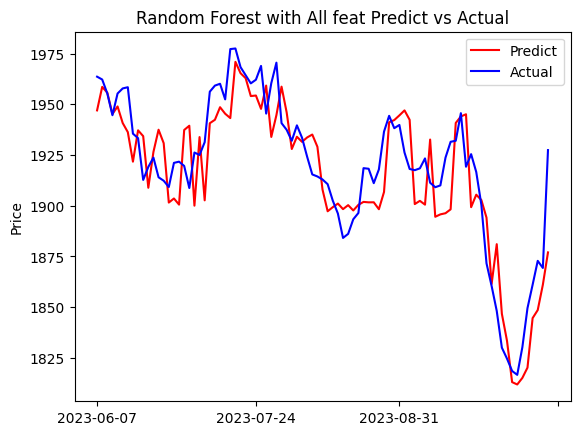

In [44]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

# LSTM

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs_Gold')
tb_callback = TensorBoard(log_dir=log_dir)

In [47]:
X_train.shape

(2362, 80)

In [48]:
y_train.shape

(2362,)

In [49]:
tmp = []

In [50]:
def getData(data):
    value = data
    return value

In [51]:
tmp = np.vectorize(getData)(X_train)

In [52]:
temp = []
temp = np.array(X_train)

In [53]:
len(temp[1])

80

In [54]:
len(tmp)

2362

In [55]:
len(tmp[1])

80

In [56]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1))

In [71]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
model.fit(Gold_train, Res_train, epochs=100, callbacks=[tb_callback])

In [60]:
model = tf.keras.models.load_model('gold_predict_ver_1.0.h5')

In [61]:
predicted_stock_price = model.predict(Gold_test)

In [62]:
predicted_stock_price.shape

(269, 1)

In [63]:
predicted_stock_price[:3]

array([[1939.837 ],
       [1316.6111],
       [1912.4977]], dtype=float32)

In [64]:
y_test[:3]

array([1804.1, 1798.9, 1761.8])

In [231]:
stock_tmp = scaler.inverse_transform(predicted_stock_price)

ValueError: non-broadcastable output operand with shape (236,1) doesn't match the broadcast shape (236,80)

In [347]:
y_test[0]

1804.1

In [65]:
predicted_stock_price[0]

array([1939.837], dtype=float32)

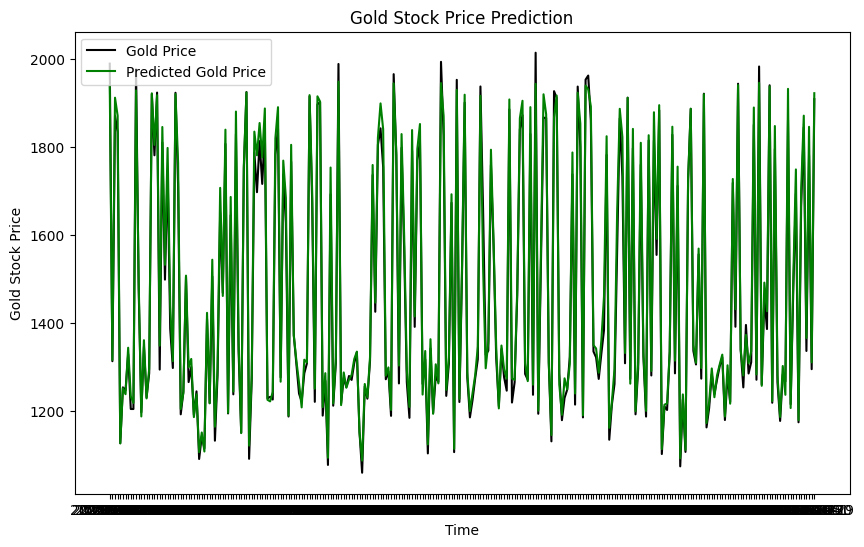

In [66]:
plt.figure(figsize=(10,6))
plt.plot(Res_test, color = 'black', label = 'Gold Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Gold Price')
plt.title('Gold Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Stock Price')
plt.legend()
plt.show()

In [932]:
R2_score_LSTM = r2_score(Res_test, predicted_stock_price)
print(R2_score_LSTM)

0.9885424677822968


In [ ]:
model.save('gold_predict_ver_1.0.h5')

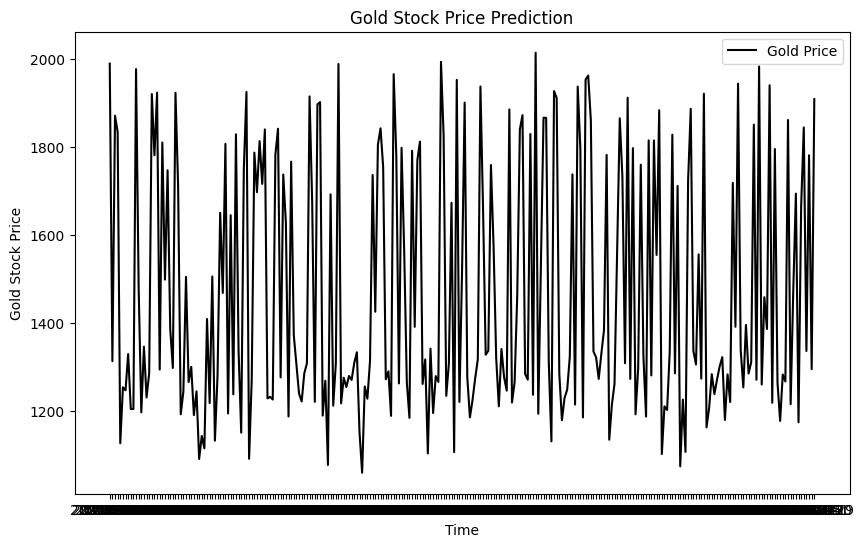

In [67]:
plt.figure(figsize=(10,6))
plt.plot(Res_test, color = 'black', label = 'Gold Price')
plt.title('Gold Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Stock Price')
plt.legend()
plt.show()

# Deep Neural Network Model

In [440]:
Gold_train.shape

(2419, 80)

In [442]:
NN_model = Sequential()
NN_model.add(Dense(64, activation='leaky_relu', input_shape=(Gold_train.shape[1], )))
NN_model.add(Dense(64, activation='leaky_relu'))
NN_model.add(Dense(1))

In [592]:
NN_model = Sequential()
NN_model.add(Dense(32, activation='relu', input_shape=(80,)))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(16, activation='relu'))
NN_model.add(Dense(16, activation='relu'))
NN_model.add(Dense(1))

In [593]:
NN_model.compile(optimizer=optimizer, loss='mse')

In [594]:
NN_model.fit(Gold_train, Res_train, epochs=150)

Epoch 1/150


76/76 [==============================] - 1s 2ms/step - loss: 1209888931840.0000
Epoch 2/150
76/76 [==============================] - 0s 2ms/step - loss: 4056892928.0000
Epoch 3/150
76/76 [==============================] - 0s 2ms/step - loss: 1517570816.0000
Epoch 4/150
76/76 [==============================] - 0s 3ms/step - loss: 1019003008.0000
Epoch 5/150
76/76 [==============================] - 0s 2ms/step - loss: 909127424.0000
Epoch 6/150
76/76 [==============================] - 0s 2ms/step - loss: 799539520.0000
Epoch 7/150
76/76 [==============================] - 0s 2ms/step - loss: 746959360.0000
Epoch 8/150
76/76 [==============================] - 0s 2ms/step - loss: 708504384.0000
Epoch 9/150
76/76 [==============================] - 0s 2ms/step - loss: 706210368.0000
Epoch 10/150
76/76 [==============================] - 0s 2ms/step - loss: 619399104.0000
Epoch 11/150
76/76 [==============================] - 0s 2ms/step - loss: 610248320.0000
Epoch 12/150
76/76 [===============

In [595]:
predicted_stock_price_2 = NN_model.predict(Gold_test)

In [596]:
predicted_stock_price_2.shape

(269, 1)

In [597]:
predicted_stock_price_2[:3]

array([[34466.004],
       [30481.006],
       [36746.004]], dtype=float32)

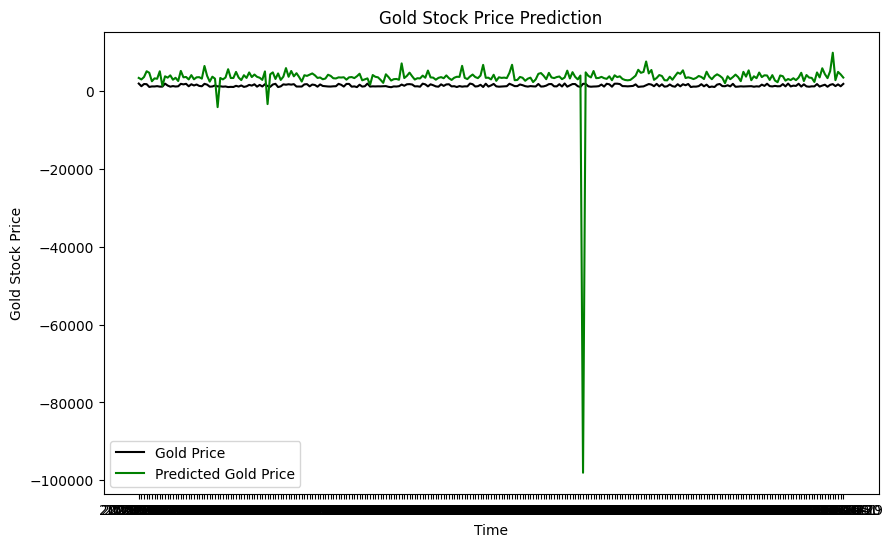

In [602]:
plt.figure(figsize=(10,6))
plt.plot(Res_test, color = 'black', label = 'Gold Price')
plt.plot(predicted_stock_price_2/10, color = 'green', label = 'Predicted Gold Price')
plt.title('Gold Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Stock Price')
plt.legend()
plt.show()

## second try with standard scaler

In [636]:
from sklearn.preprocessing import StandardScaler

In [642]:
test['Adj Close'].shape

(2688,)

In [643]:
scale = StandardScaler()

scaledX = scale.fit_transform(Gold_train)

In [648]:
Gold_train[:1]

,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume,...,GDX_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-21,106.24,107.76,106.08,106.92,4245,98.59,100.25,98.25,99.46,191289,...,23183300,1351.14,1382.570904,1319.709096,14.167721,19.446861,52.292506,17.569946,3.1,3.3


In [647]:
scaledX[:1]

array([[ 1.4605775 ,  1.47758147,  1.50448612,  1.48844438, -1.46644283,
         1.45260031,  1.47234329,  1.49619575,  1.49044472, -1.12190022,
        -1.14412502, -1.13770958, -1.13801771, -1.14906813, -1.14906813,
         0.68749648,  1.31399079,  1.28125666,  1.27033402,  1.25805261,
         1.03043898,  2.28466251,  2.28044258,  2.30522578,  2.28451816,
         0.        , -0.48949898, -0.51231509, -0.47759137, -0.17661409,
        -1.93441981, -1.9603416 , -1.93574328, -1.95071275, -0.02805075,
        -0.76604201, -0.76836528, -0.7790075 , -0.78022474, -0.09426009,
         1.78308342,  1.76874154,  1.79445166,  1.78063803, -0.17117657,
        -1.04957082, -1.04858503, -1.05133562, -1.05853738, -1.05853738,
         1.45664375,  0.21495768,  0.19666154,  0.20990687,  0.17922903,
        -0.17518564,  1.94121303,  1.93565769,  1.95964272,  1.93190807,
        -0.5895137 ,  2.07128117,  2.08430136,  2.09334579,  2.07826823,
        -0.72637922, -0.09948376, -0.13532047, -0.1

In [649]:
NN_model_2 = Sequential()
NN_model_2.add(Dense(32, activation='relu', input_shape=(80,)))
NN_model_2.add(Dense(32, activation='relu'))
NN_model_2.add(Dense(32, activation='relu'))
NN_model_2.add(Dense(32, activation='relu'))
NN_model_2.add(Dense(16, activation='relu'))
NN_model_2.add(Dense(16, activation='relu'))
NN_model_2.add(Dense(1))

In [650]:
NN_model_2.compile(optimizer=optimizer, loss='mse')

In [651]:
NN_model_2.fit(scaledX, Res_train, epochs=150)

Epoch 1/150
76/76 [==============================] - 1s 2ms/step - loss: 2206681.5000
Epoch 2/150
76/76 [==============================] - 0s 2ms/step - loss: 1402598.0000
Epoch 3/150
76/76 [==============================] - 0s 2ms/step - loss: 170981.0469
Epoch 4/150
76/76 [==============================] - 0s 2ms/step - loss: 85338.0078
Epoch 5/150
76/76 [==============================] - 0s 2ms/step - loss: 74992.1953
Epoch 6/150
76/76 [==============================] - 0s 2ms/step - loss: 67635.8906
Epoch 7/150
76/76 [==============================] - 0s 2ms/step - loss: 61708.0898
Epoch 8/150
76/76 [==============================] - 0s 2ms/step - loss: 56496.1328
Epoch 9/150
76/76 [==============================] - 0s 2ms/step - loss: 52071.4336
Epoch 10/150
76/76 [==============================] - 0s 2ms/step - loss: 48407.2891
Epoch 11/150
76/76 [==============================] - 0s 2ms/step - loss: 45207.2617
Epoch 12/150
76/76 [==============================] - 0s 2ms/step - l

In [652]:
predicted_stock_price_3 = NN_model_2.predict(Gold_test)

In [657]:
scaled = NN_model_2.predict(scale.transform(Gold_test))

In [658]:
scaled[:3]

array([[1988.637 ],
       [1233.232 ],
       [1881.9398]], dtype=float32)

In [663]:
min(scaled)

array([1059.6201], dtype=float32)

In [664]:
min(Res_test)

1060.3

In [654]:
y_test[:3]

array([1804.1, 1798.9, 1761.8])

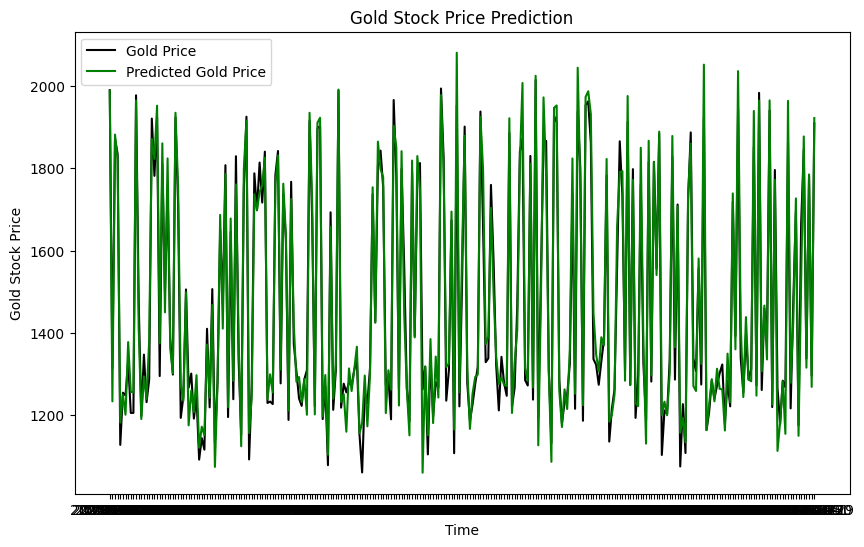

In [659]:
plt.figure(figsize=(10,6))
plt.plot(Res_test, color = 'black', label = 'Gold Price')
plt.plot(scaled, color = 'green', label = 'Predicted Gold Price')
plt.title('Gold Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Stock Price')
plt.legend()
plt.show()

In [931]:
R2_score_DNN = r2_score(Res_test, scaled)
print(R2_score_DNN)

0.9663813380845961


In [661]:
NN_model_2.save('Gold_Predict_DNN.h5')

# Logistic

## Process data for Logistic

In [935]:
new_df = test
new_df[:3]

,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume,...,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low,Rise
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-11,108.32,108.34,107.43,108.01,1065,85.70,86.37,85.21,85.79,217859,...,1721.346667,1756.500928,1686.192405,-3.282425,-1.528526,37.515589,7.842321,1.8,8.2,False
2012-12-12,108.90,110.47,108.85,109.50,1756,85.69,87.68,85.68,86.77,300353,...,1720.186667,1754.693881,1685.679453,-2.812705,-1.816257,40.409357,6.584224,-6.5,14.3,True
2012-12-13,108.99,109.17,107.81,107.91,833,86.77,86.97,85.81,85.89,228417,...,1718.346667,1755.039435,1681.653898,-3.992102,-2.292319,35.949800,8.176307,11.6,17.3,False


In [936]:
def will_it_rise(open, close):
    rise = False
    if open - close < 0:
        rise = True
    else: rise = False
    return rise

In [916]:
new_df['Rise'] = np.vectorize(will_it_rise)(new_df['Open'], new_df['Adj Close'])

C:\Users\nguye\AppData\Local\Temp\ipykernel_9712\3937116139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rise'] = np.vectorize(will_it_rise)(new_df['Open'], new_df['Adj Close'])


In [942]:
new_df[['Open', 'Adj Close', 'Rise']][:3]

,Open,Adj Close,Rise
Date,,,
2012-12-11,1710.0,1708.2,False
2012-12-12,1710.1,1716.6,True
2012-12-13,1707.2,1695.6,False


In [946]:
feature_columns_2 = ['BZ=F_Open', 'BZ=F_High', 'BZ=F_Low', 'BZ=F_Close', 'BZ=F_Volume',
       'CL=F_Open', 'CL=F_High', 'CL=F_Low', 'CL=F_Close', 'CL=F_Volume',
       '^DJI_Open', '^DJI_High', '^DJI_Low', '^DJI_Close', '^DJI_Adj Close',
       '^DJI_Volume', 'EGO_Open', 'EGO_High', 'EGO_Low', 'EGO_Close',
       'EGO_Volume', 'EURUSD=X_Open', 'EURUSD=X_High', 'EURUSD=X_Low',
       'EURUSD=X_Close', 'EURUSD=X_Volume', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'DX-Y.NYB_Open', 'DX-Y.NYB_High', 'DX-Y.NYB_Low',
       'DX-Y.NYB_Close', 'DX-Y.NYB_Volume', 'PA=F_Open', 'PA=F_High',
       'PA=F_Low', 'PA=F_Close', 'PA=F_Volume', 'PL=F_Open', 'PL=F_High',
       'PL=F_Low', 'PL=F_Close', 'PL=F_Volume', '^GSPC_Open', '^GSPC_High',
       '^GSPC_Low', '^GSPC_Close', '^GSPC_Adj Close', '^GSPC_Volume',
       'SI=F_Open', 'SI=F_High', 'SI=F_Low', 'SI=F_Close', 'SI=F_Volume',
       'BNO_Open', 'BNO_High', 'BNO_Low', 'BNO_Close', 'BNO_Volume',
       'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Volume',
       'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Volume', 'SMA',
       'Upper_band', 'Lower_band', 'DIF', 'MACD', 'RSI', 'STDEV', 'Open_Close',
       'High_Low']

In [947]:
feature_columns_3 = ['Open', 'High', 'Low', 'Close', 'Adj Close']

In [948]:
X_logistic = new_df[feature_columns_3]
y_logistic = new_df['Rise']

In [949]:
X_logistic = new_df[feature_columns_2]
y_logistic = new_df['Rise']

In [950]:
X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test = train_test_split(X_logistic, y_logistic, test_size=0.1)

In [951]:
X_logistic_train.shape

(2419, 82)

## Model

In [952]:
LG_model = LogisticRegression().fit(X_logistic_train, y_logistic_train)
training_score_LG = cross_val_score(LG_model, X_logistic_train, y_logistic_train, cv=5)

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [953]:
print("Logistic has a training score of", round(training_score_LG.mean(), 2) * 100, "% accuracy score")

Logistic has a training score of 54.0 % accuracy score
